In [2]:
! pip install yfinance -q

In [20]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Part 1 - Data Preprocessing

### Download Data from Yahoo Finance

In [7]:
df = yf.download('AAPL', start='2017-01-01', end='2022-12-05')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000
2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111224400
2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400
2022-12-02,145.960007,148.000000,145.649994,147.809998,147.809998,65421400


### Visualizing the Time series

Text(0, 0.5, 'Prices ($)')

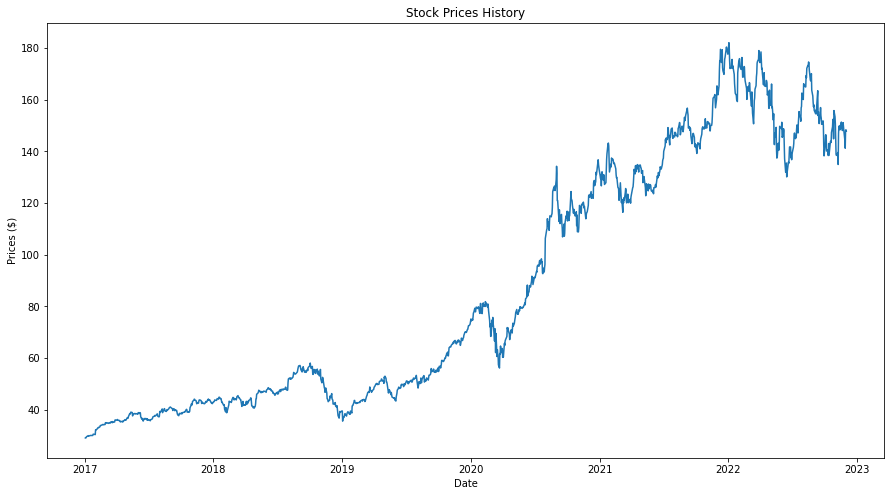

In [8]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1491 entries, 2017-01-03 to 2022-12-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1491 non-null   float64
 1   High       1491 non-null   float64
 2   Low        1491 non-null   float64
 3   Close      1491 non-null   float64
 4   Adj Close  1491 non-null   float64
 5   Volume     1491 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 81.5 KB


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1.491000e+03
mean,87.350116,88.376643,86.374644,87.422366,85.991089,1.159332e+08
std,47.878518,48.525269,47.237935,47.906744,48.331052,5.375046e+07
min,28.950001,29.082500,28.690001,29.004999,27.144337,3.519590e+07
25%,43.790001,44.175001,43.575001,43.850000,42.092758,8.084015e+07
50%,65.919998,66.519997,65.267502,66.040001,64.697899,1.018324e+08
75%,135.014999,136.615005,133.574997,134.869995,133.523232,1.344660e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,4.479400e+08


### Feature Scaling

In [ ]:
close_prices = df['Close'].values

training_len = math.ceil(len(close_prices)* 0.8)

MMS = MinMaxScaler(feature_range=(0,1))
scaled_df = MMS.fit_transform(close_prices.reshape(-1,1))

### Preparation of training set

In [11]:
train_df = scaled_df[0: training_len, :]

x_train = []
y_train = []

for i in range(60, len(train_df)):
    x_train.append(train_df[i-60:i, 0])
    y_train.append(train_df[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Preparation of test set

In [19]:
test_df = scaled_df[training_len-60: , : ]
x_test = []
y_test = close_prices[training_len:]

for i in range(60, len(test_df)):
      x_test.append(test_df[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Part 2 - Building and Training the RNN

### LSTM Network Architecture

In [21]:
### Initialising the RNN
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer
regressor.add(Dense(units = 1))

### Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.summary()

### Fitting the RNN to the Training set

In [22]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 15s 116ms/step - loss: 0.0175
Epoch 2/100
36/36 [==============================] - 4s 118ms/step - loss: 0.0030
Epoch 3/100
36/36 [==============================] - 4s 118ms/step - loss: 0.0025
Epoch 4/100
36/36 [==============================] - 4s 119ms/step - loss: 0.0027
Epoch 5/100
36/36 [==============================] - 4s 116ms/step - loss: 0.0023
Epoch 6/100
36/36 [==============================] - 4s 117ms/step - loss: 0.0023
Epoch 7/100
36/36 [==============================] - 4s 120ms/step - loss: 0.0024
Epoch 8/100
36/36 [==============================] - 4s 116ms/step - loss: 0.0022
Epoch 9/100
36/36 [==============================] - 4s 117ms/step - loss: 0.0023
Epoch 10/100
36/36 [==============================] - 4s 119ms/step - loss: 0.0030
Epoch 11/100
36/36 [==============================] - 4s 116ms/step - loss: 0.0023
Epoch 12/100
36/36 [==============================] - 4s 114ms/step - loss: 0.0021
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

In [24]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = MMS.inverse_transform(predicted_stock_price)

10/10 [==============================] - 0s 44ms/step


In [26]:
rmse = np.sqrt(np.mean(predicted_stock_price - y_test)**2)
rmse

9.918482070001179

### Visualising the results

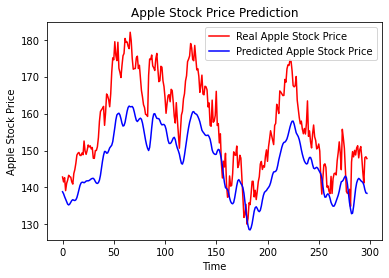

In [37]:
plt.plot(y_test , color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

C:\Users\Setar\AppData\Local\Temp/ipykernel_10600/2802737614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predicted_stock_price


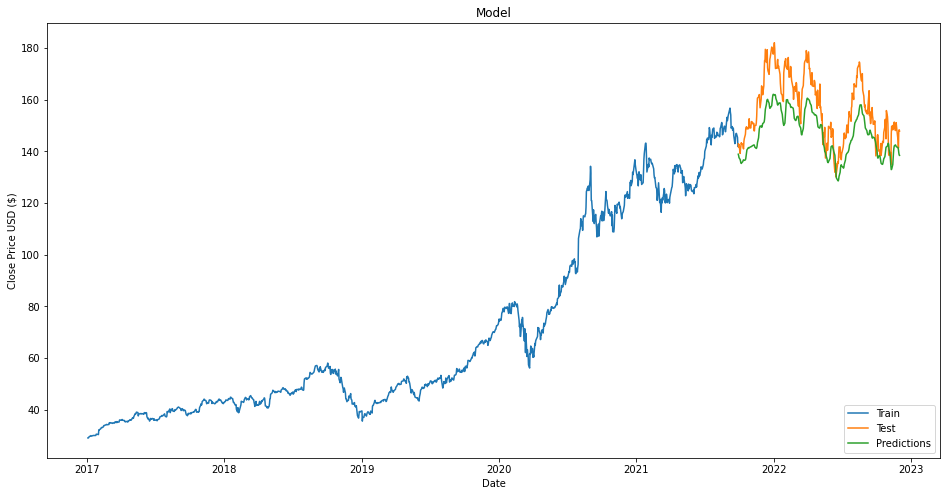

In [38]:
data = df.filter(['Close'])
train = data[:training_len]
validation = data[training_len:]
validation['Predictions'] = predicted_stock_price
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()